<hr style="border:1px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> FUNDAMENTOS MATEMATICOS PARA INTELIGENCIA ARTIFICIAL</h1></center> 
<center><h1 style="color:#173F8A;"> IMT 3850</h1></center>
<hr style="border:1px solid #FEC60D"> </hr>
<center><h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br></h3></center>
<h3 style="color:#03122E;text-align:right;"> Magister en Inteligencia Artificial - MIA <br> Instituto de Ingenieria Matematica y Computacional - IMC<br>  Pontificia Universidad Catolica de Chile<br>   </h3>




<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

 <hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Optimizacion - clase 8</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))
from matplotlib import cm
from matplotlib.ticker import LinearLocator

## Ejemplo: descenso del gradiente

**Descenso Zig-Zag**
$$
f(x,y) = \frac{1}{2} (x^2 + b y^2)
$$

In [16]:
# Line search
from scipy.optimize import line_search
b=0.8
def objective_function(x):
    
    return 0.5*(x[0]**2+b*x[1]**2)

def gradient(x):
    return np.array([x[0], b*x[1]])

x = np.array([b, 1.0])  # Initial point
direction = np.array([-1.0, -1.0])  # Search direction

# Perform line search
alpha, _, _, _, _, _ = line_search(objective_function, gradient, x, direction)

print("Step size:", alpha)

print("Exact line search:", 2.0/(b+1.0))

Step size: 1.0
Exact line search: 1.1111111111111112


0.006465611340011584 0.00789843379763188 0.009648779237550304 0.011787012863600238 0.01439909327658644 0.017590028074721948 0.021488095238095237 0.026250000000000002


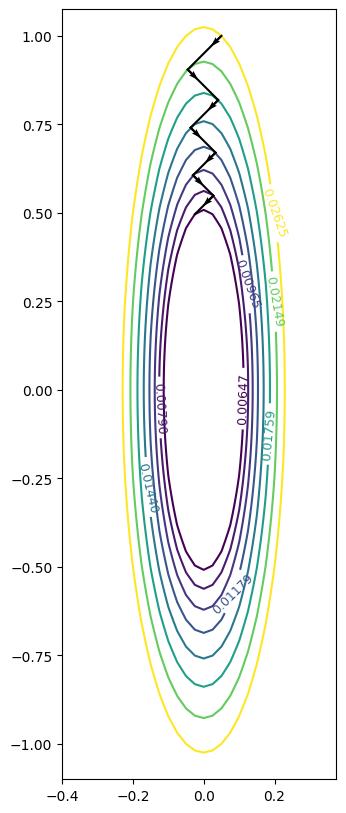

In [22]:
b = 0.05
f = lambda x,y: 0.5*(x**2+b*y**2)
# iteration
# starting
x0 = b; y0 = 1.0; f0 = f(x0,y0)
gamma = 2.0/(b+1.0)
xfun = lambda k: b*((b-1)/(b+1))**k
yfun = lambda k: ((1-b)/(b+1))**k

x1 = xfun(1); y1 = yfun(1); f1 = f(x1,y1)
x2 = xfun(2); y2 = yfun(2); f2 = f(x2,y2)
x3 = xfun(3); y3 = yfun(3); f3 = f(x3,y3)
x4 = xfun(4); y4 = yfun(4); f4 = f(x4,y4)
x5 = xfun(5); y5 = yfun(5); f5 = f(x5,y5)
x6 = xfun(6); y6 = yfun(6); f6 = f(x6,y6)
x7 = xfun(7); y7 = yfun(7); f7 = f(x7,y7)
print(f7,f6, f5,f4,f3,f2,f1,f0)
fig, ax = plt.subplots(1,1, figsize=(10,10))
x = np.arange(-.4, .4, 0.025)
y = np.arange(-1.1, 1.1, 0.025)
X, Y = np.meshgrid(x, y)
z = f(X,Y)

CS = ax.contour(X,Y, z, levels=[f7,f6,f5,f4,f3,f2,f1,f0])#,colors=['C05', 'C04', 'C03','C02', 'C01', 'C00'])
ax.clabel(CS, fontsize=9, inline=True)
ax.quiver(x0, y0, -x0, -b*y0, color='k')
ax.plot([x0,x1],[y0,y1],'k')

ax.quiver(x1, y1, -x1, -b*y1, color='k')
ax.plot([x1,x2],[y1,y2],'k')

ax.quiver(x2, y2, -x2, -b*y2, color='k')
ax.plot([x2,x3],[y2,y3],'k')

ax.quiver(x3, y3, -x3, -b*y3, color='k')
ax.plot([x3,x4],[y3,y4],'k')

ax.quiver(x4, y4, -x4, -b*y4, color='k')
ax.plot([x4,x5],[y4,y5],'k')

ax.quiver(x5, y5, -x5, -b*y5, color='k')
ax.plot([x5,x6],[y5,y6],'k')

ax.quiver(x6, y6, -x6, -b*y6, color='k')
ax.plot([x6,x7],[y6,y7],'k')

ax.set_aspect('equal')

plt.show()

## Ejemplo: descenso del gradiente con backtracking

In [7]:
def graddescent_backtracking(f, gradf, x0, MAXITER = 1000, TOL = 1e-6):
    iter = 0
    xi = x0.copy()
    gamma_i = 1
    error = 1.
    
    while error>TOL and iter<MAXITER:
        xnew = xi- gamma_i*gradf(xi)
        alpha = 0
        beta = 0.5
        gamma_i = 1.0
        while f(xnew)>f(xi)-alpha*gamma_i*np.linalg.norm(gradf(xi))**2:
            # decrease step size
            gamma_i = beta*gamma_i
            print("gamma: ", gamma_i)
            xnew = xi- gamma_i*gradf(xi)
        
        error = np.linalg.norm(xnew-xi)
        xi = xnew
        print("x: ", xi, "f(x): ", f(xi))
        iter += 1
        
    return xi, iter

In [8]:
fun = lambda x: 0.5*(x[0]**2+10*x[1]**2)
gradfun = lambda x: np.array([x[0], 10*x[1]])
graddescent_backtracking(fun, gradfun, x0= np.array([10,1]), MAXITER = 1000, TOL = 1e-6)

gamma:  0.5
gamma:  0.25
x:  [ 7.5 -1.5] f(x):  39.375
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [6.5625 0.375 ] f(x):  22.236328125
x:  [ 5.7421875 -0.09375  ] f(x):  16.530303955078125
x:  [0.      0.84375] f(x):  3.5595703125
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.        -0.2109375] f(x):  0.22247314453125
x:  [0.         0.05273438] f(x):  0.013904571533203125
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.         -0.01318359] f(x):  0.0008690357208251953
x:  [0.        0.0032959] f(x):  5.431473255157471e-05
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.         -0.00082397] f(x):  3.394670784473419e-06
x:  [0.         0.00020599] f(x):  2.121669240295887e-07
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.00000000e+00 -5.14984131e-05] f(x):  1.3260432751849294e-08
x:  [0.00000000e+00 1.28746033e-05] f(x):  8.287770469905809e-10
gamma:  0.5
gamma:  0.25
gamma:  0.125
x:  [ 0.00000000e+00 -3.21865082e-06] f(x):  5.1798565436911304e-11
x:  [0.00000000e+00 8.04662704e-07] 

(array([0.0000000e+00, 5.0291419e-08]), 16)

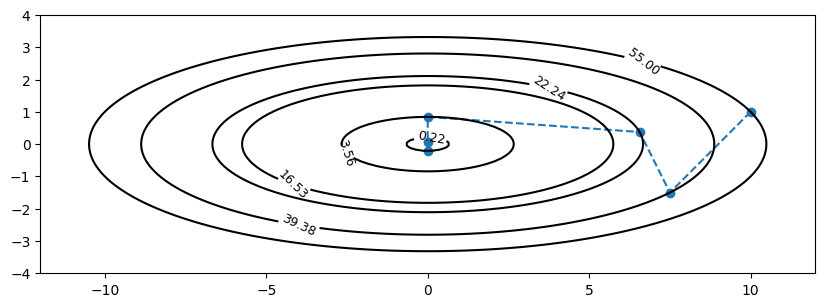

In [9]:
x = np.linspace(-12, 12,100)
y = np.linspace(-4, 4,100)
y = y.reshape(-1, 1)
X, Y = np.meshgrid(x, y)
z = fun([x,y])

fig, ax = plt.subplots(figsize=(10,10))
#ax.plot(10,1,'C00',marker='o')
#ax.plot( 7.5, -1.5,'C01',marker='o')
#ax.plot(6.5625, 0.375,'C02',marker='o')
#ax.plot(0.   ,   0.84375,'C03',marker='o')
#ax.plot( 0. ,       -0.2109375,'C04',marker='o')
#ax.plot(0.   ,      0.05273438,'C05',marker='o')
ax.plot([10,7.5,6.5625,0. ,0.,0. ]  , [ 1,-1.5,0.375,0.84375,-0.2109375,0.05273438],'C00',linestyle='--', marker='o')
CS = ax.contour(X,Y, z, levels=[0.013904571533203125, 0.22247314453125, 3.5595703125,16.530303955078125, 22.236328125, 39.375, 55],
               colors='k')#,colors=['C05', 'C04', 'C03','C02', 'C01', 'C00'])
ax.clabel(CS, fontsize=9, inline=True)
ax.set_aspect('equal')



In [23]:
10**(0.75)/2 -np.sqrt(10)

-0.35057103421663394